#Фролов Владимир

Для выполнения задания был выбран набор данных, содержащий данные о продаже видеоигр:

https://www.kaggle.com/datasets/gregorut/videogamesales

**Цель работы:** найти наиболее перспективный жанр игры для потенциальной разработки.

**Исследуемая гипотеза:** есть жанр игр (возможно в связке с платформой или что-то еще), который продается лучше.

#Загрузка и проверка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! wget https://raw.githubusercontent.com/knpraveen/VideoGameSales/master/vgsales.csv

In [ ]:
data = pd.read_csv('/content/vgsales.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Поля и типы данных:

*   $Rank$ $-$ Рейтинг общих продаж, целое число
*   $Name$ $-$ Название игры
*   $Platform$ $-$ Платформа выпуска игр (т.е. ПК, PS4 и т.д.), object
*   $Year$ $-$ Год выхода игры, float
*   $Genre$ $-$ Жанр игры, object
*   $Publisher$ $-$ Разработчик игры, object
*   $NA~Sales$ $-$ Продажи в Северной Америке (в миллионах), float
*   $EU~Sales$ $-$ Продажи в Европе (в миллионах), float
*   $JP~Sales$ $-$ Продажи в Японии (в миллионах), float
*   $Other~Sales$ $-$ Продажи в остальном мире (в миллионах), float
*   $Global~Sales$ $-$ Общий объем продаж по всему миру, float






In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
data.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [ ]:
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Колонку $Year$ не хотелось бы заполнять средними или медианными значениями, т.к. такое действие в данном случае может пошатнуть баланс распределений всех признаков по годам. Однако если же обучать модель машинного обучения, то, конечно, стоит это сделать. Но если это делать, то лучше на основе анализа распределения продаж по годам. Колонку $Publisher$, т.е. издателя игры, заполнить будет проблематично, но если делать это, то так же лучше после анализа.

In [ ]:
if data.shape == data.drop_duplicates().shape:
    print('Дубликатов нет')
else:
    data.drop_duplicates(inplace=True)
    print('Дубликаты обнаружены и удалены')

Дубликатов нет


In [ ]:
data['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

Отметим, что начиная после $2015$-го года данных о покупках мало. Это может повлиять на наши выводы в предположении, что наши данные исчерпывающи. Условно, мы будем смотреть распределение по годам и констатировать, что, например, **$\textbf{2020}$-й год неудачный с точки зрения продаж, т.к. там всего один объект (одна покупка), а это не совсем верно, учитывая общий тренд в мире на повышения интереса к видеоиграм в последние $\textbf{10-15}$ лет.** Поэтому я избавляюсь от данных, которые собраны после $\textbf{2015}$-го года.

P.S. Так же можно рассуждать и про $80$-е и $90$-е года, но всё-таки есть понимание, что тогда видеоигры были не только не популярны, но и являлись привелегией зажиточных горожан. Т.е. если оставим эти данные это не нарушит тренда, в отличие от данных после $2015$-го года. Поэтому эти данные трогать не будем, хотя можно было бы.

In [ ]:
data.drop(data[data['Year'] > 2015].index, inplace=True)

In [ ]:
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
data['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

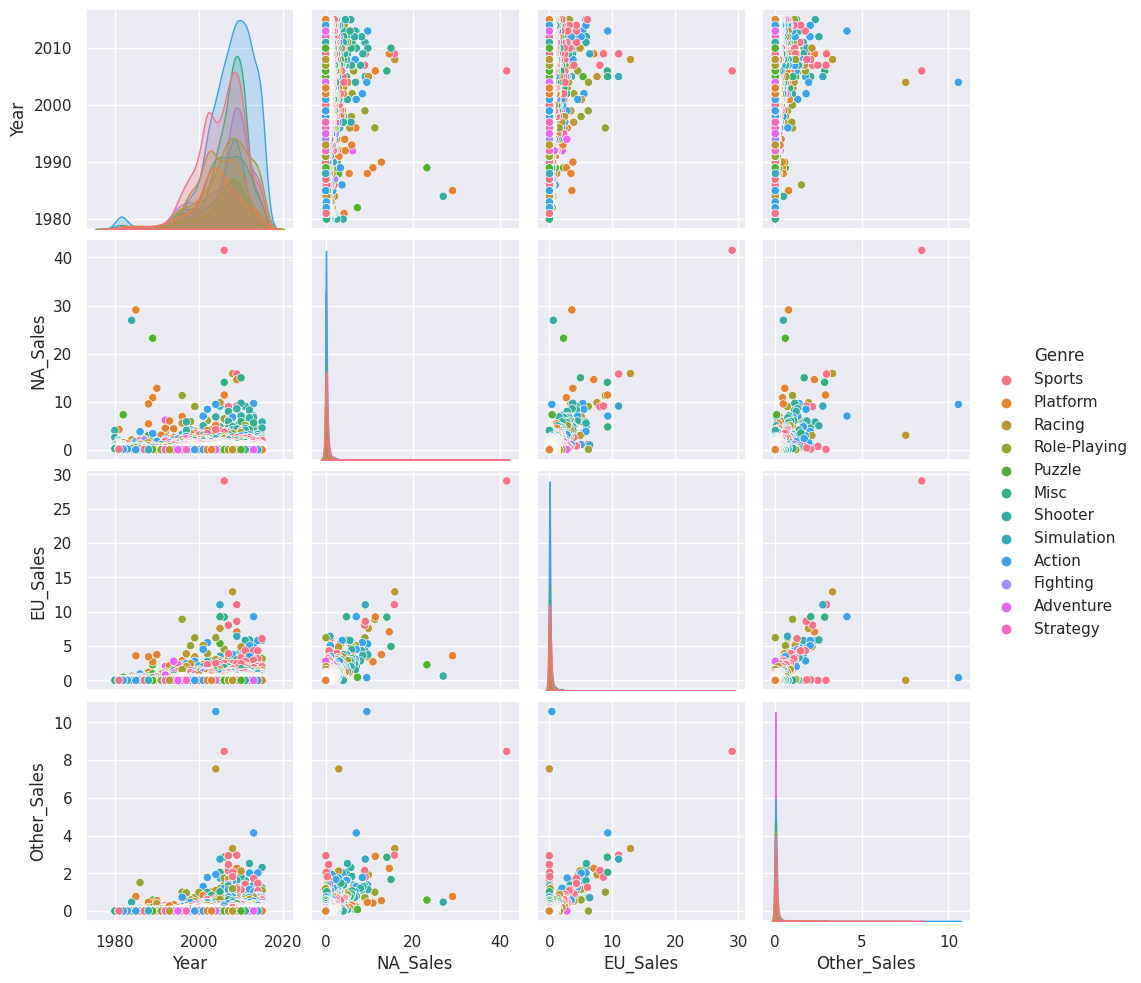

In [ ]:
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
sns.pairplot(data_pair, hue='Genre')

Похоже, продажи по регионам имеют логнормальное распределение. А также отметим возможную корреляцию продаж в Европе с продажами в Северной Америке и $Other~Sales$, которую здесь можно проследить.

#Распределение количества проданных игр по жанрам

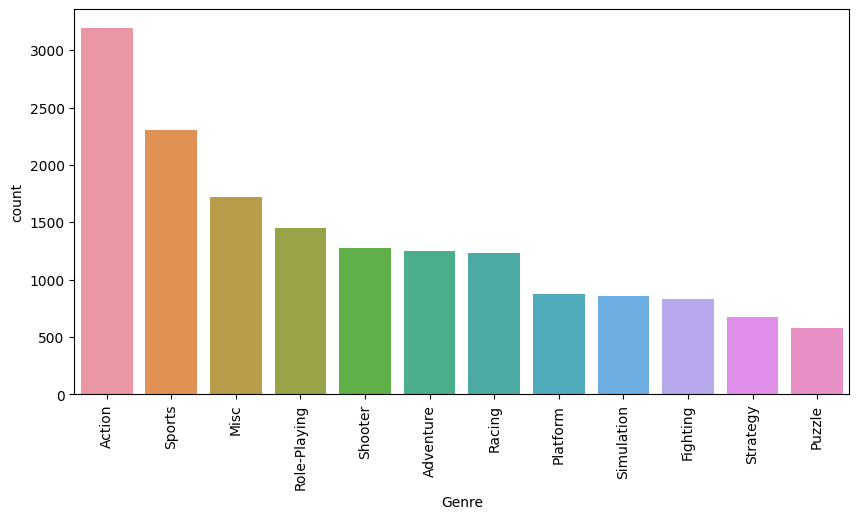

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Genre", data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=90);

In [ ]:
data['Genre'].value_counts().iloc[:5]

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Name: Genre, dtype: int64

Отметим, что на первый взгляд наиболее популярен экшн жанр, но это как-будто неудивительно, т.к. это супернейтральный жанр. Интересно, что второе место занимает жанр "спорт", т.к. это уже определённая ниша (субъективное мнение). Более нейтральные жанры типа шутер и гонки даже в тройку не попали. Жанр $misc$ ($miscellaneous$) для автора не очень интерпретируем, но если мультижанровые игры попадают под эту категорию, то неудивителен её успех $-$ третье место.

#Распределение количества проданных игр по годам

Сгруппируем данные по году и сагрегируем по названию игры.

In [ ]:
agg_name = data.groupby(by=['Year'])['Name']

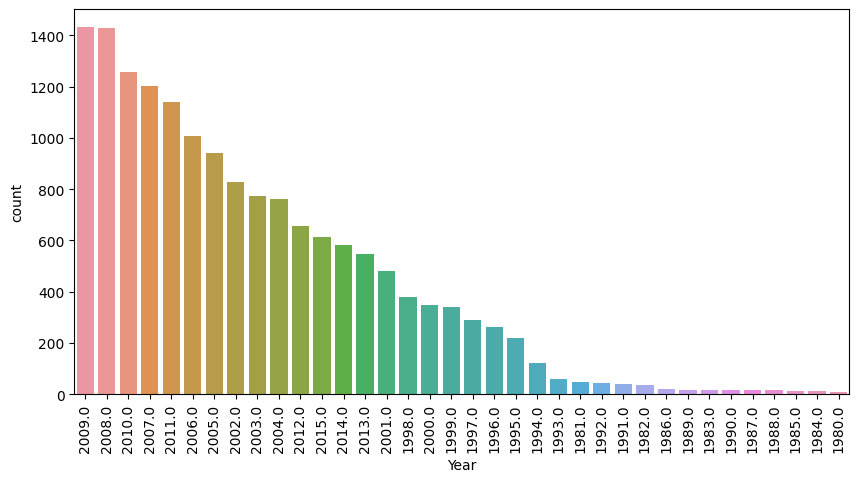

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Year", data=data, order=agg_name.count().sort_values(ascending=False).index)
plt.xticks(rotation=90);

In [ ]:
agg_name.count().sort_values(ascending=False).iloc[:5]

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
Name: Name, dtype: int64

Хорошо, похоже, что игры действительно стали наиболее популярны $10$-$15$ лет назад, а наиболее активно любители игр себя вели в период с $2006$-го по $2011$-й года. Так сложилось, что и у автора данной работы период наибольшей видеоигровой активности пришёлся ровно на это же время.

#Распределение количества проданных игр по годам из топ-$5$

Что ж, давайте посмотрим как распределилсь жанры в годах из топовой пятёрки.

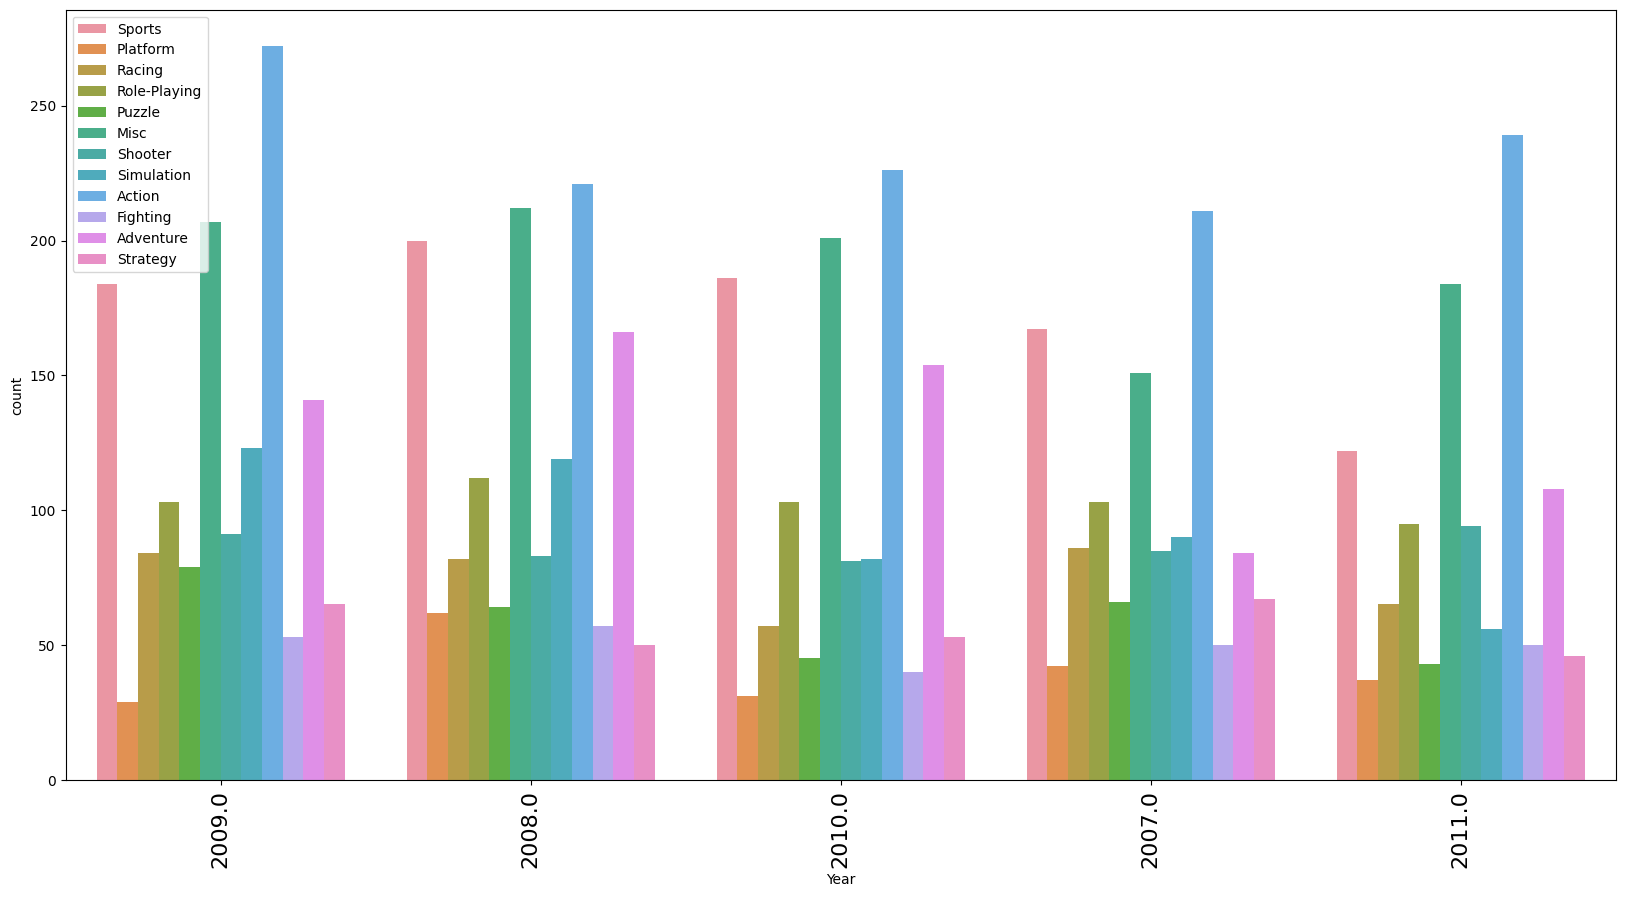

In [ ]:
top_5 = data['Year'].value_counts().iloc[:5].index

plt.figure(figsize=(20, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=top_5)
plt.legend(loc='upper left')
plt.xticks(size=16, rotation=90);

Хорошо, жанр "экшн" во все года из топ-$5$ показывал стабильно лучшие результаты. Второе место жанр $misc$, но опять же, если это в том числе и мультижанровые игры, то неудивительно, а скорее даже закономерно, в частности $MMO$-$RPG$, которые скорее всего попали бы под эту категорию, а не $Role$-$Playing$, были довольно популярны в то время, хотя в те времена они либо были бесплатные, либо их "пиратили", но это уже другая история. Говоря про жанр "спорт", то тут уже не второе, а третье место в среднем.

#Распределение объёмов продаж во всём мире по годам

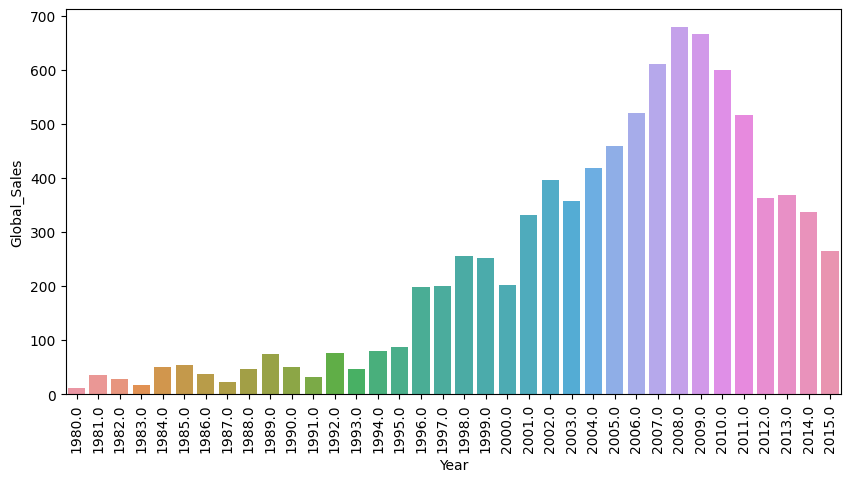

In [ ]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90);

In [ ]:
data_year.sort_values(by='Global_Sales', ascending=False).iloc[:5, :]

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04


Собственно, эти данные подтверждают предыдущие выводы об активности, только теперь с точки зрения объёмов продаж по миру $-$ с $2006$-го по $2011$-й года наблюдаем пик мировых продаж видеоигр. Только любопытно, что $2011$-й год по продажам всё же не вошёл в топ-5, вместо него здесь $2006$-й год.

Исходя из полученных данных, можем заполнить пропуски в колонке $Year$ (не слишком принципиально, заполним либо значением $2009$, либо $2008$, таким образом не нарушим баланс). Однако я оставлю код закомментированным, для дальнейшего анализа буду использовать исходный набор данных, только с исключёнными объектами, у которых по колонке $Year > 2015$, выше была дана мотивация этому действию.

In [ ]:
#data.fillna(float(2009), inplace=True)

In [ ]:
#data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#Наибольшее количество продаж по жанрам в каждый из годов

Посчитаем количество релизов в каждом из жанров для каждого года, далее возьмём максимум из всех жанров и присвоим его всем строкам в этом году, вернём булевый вектор строк, который будет показывать индекс жанра с максимальным количеством релизов в соответствующем году, затем создадим новую таблицу уже из названий жанров с максимальным количеством релизов в каждом году и числом релизов, далее избавимся от дубликатов, т.к. хотим вывести на графике только один жанр.

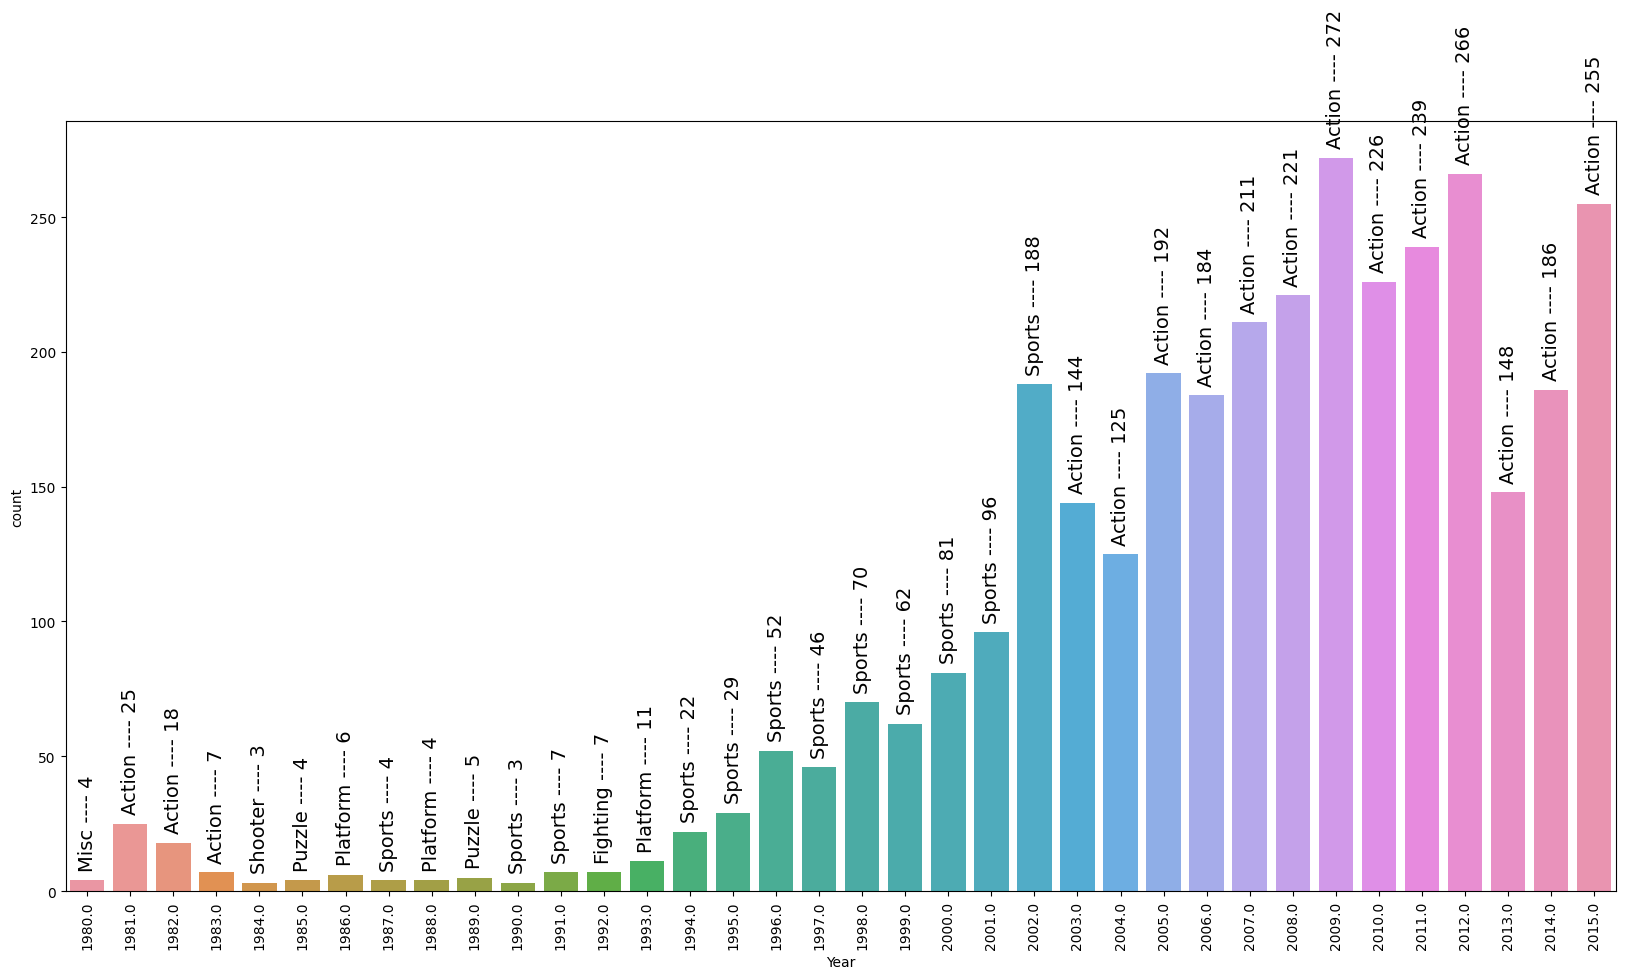

In [ ]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

genre = year_max_genre['Genre'].values
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + ' ---- ' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

In [ ]:
year_max_genre.sort_values(by='count', ascending=False).iloc[:5, :]

,Year,Genre,count
29,2009.0,Action,272
32,2012.0,Action,266
35,2015.0,Action,255
31,2011.0,Action,239
30,2010.0,Action,226


Оказывается, жанр "экшн" стал популярен только начиная с $2003$-го года, а до этого господствовали спортивные игры. Пики релизов приходятся на $2009$-й и $2012$-й года.

#Наибольший объём мировых продаж по жанрам в каждый из годов

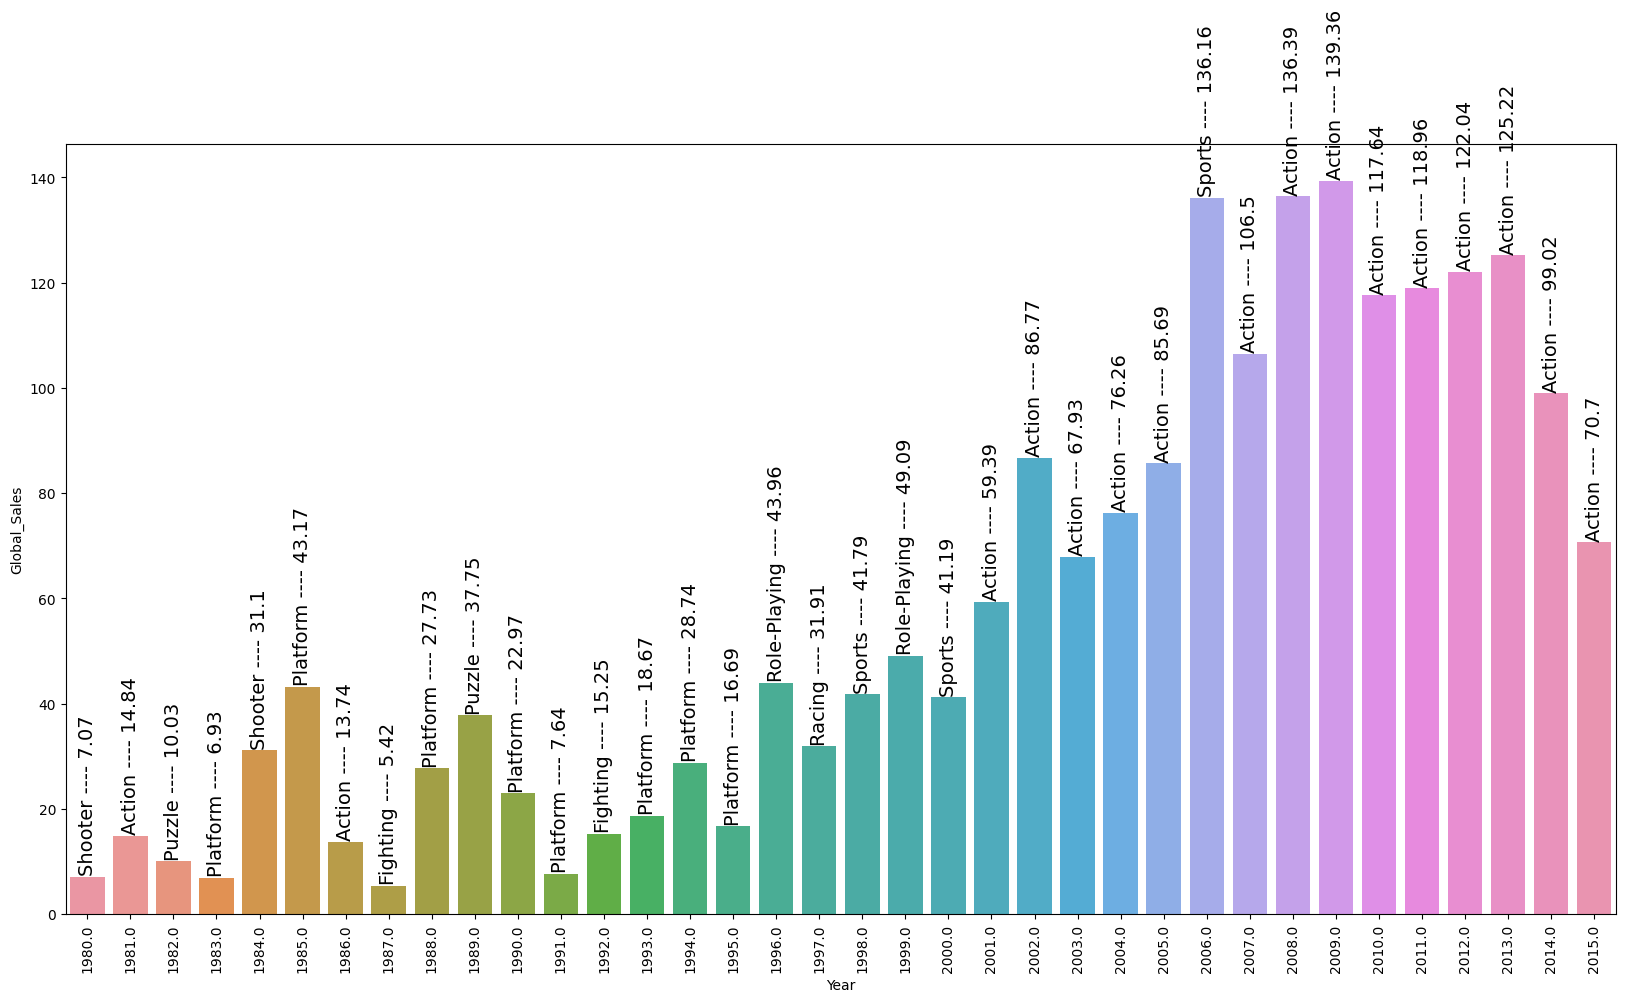

In [ ]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + ' ---- ' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

In [ ]:
year_sale_max.sort_values(by='Global_Sales', ascending=False).iloc[:5, :]

,Year,Genre,Global_Sales
29,2009.0,Action,139.36
28,2008.0,Action,136.39
26,2006.0,Sports,136.16
33,2013.0,Action,125.22
32,2012.0,Action,122.04


Отметим, что в целом всё довольно предсказуемо $-$ экшн-игры на первом месте. Однако отметим, что в $2006$-м в последний раз выстрелили спортивные игры, хотя по релизам они уже проигрывали экшн-играм. Во второй половине $80$-х и в первой половине $90$-х по мировым продажам доминировали платформеры (типичные игры на сегу или денди: марио, соник и т.п.). Хм, ну да, что-то об этом слышали, даже играли.

#Объёмы мировых продаж для всех жанров за всё время

In [ ]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

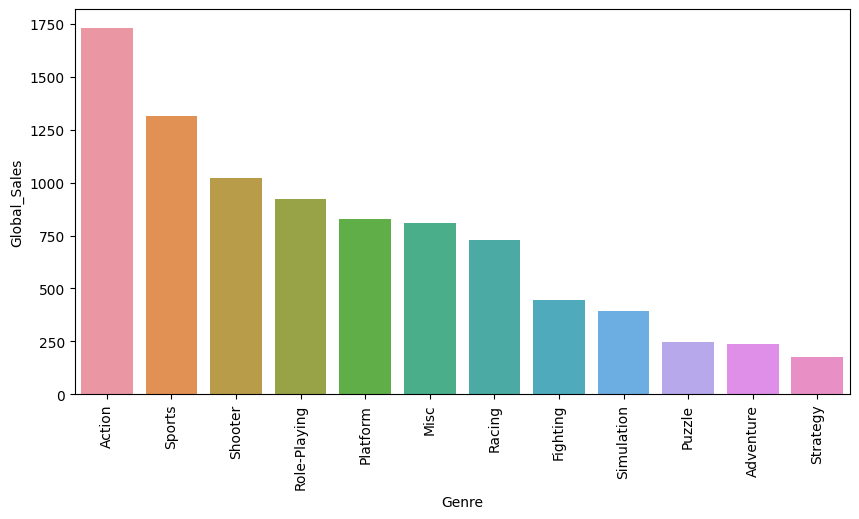

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90);

In [ ]:
data_genre.iloc[:5, :]

,Genre,Global_Sales
0,Action,1731.26
10,Sports,1316.33
8,Shooter,1019.15
7,Role-Playing,920.57
4,Platform,829.30


В целом, без сюрпризов, однако в топ-$3$ ворвались шутеры, а в топ-$5$ $-$ платформеры. $misc$ по мировым продажам за всё время не вошли в топ-$5$, в отличие от количества проданных экземпляров.

#Наибольшие объёмы мировых продаж из всех игр для каждого года

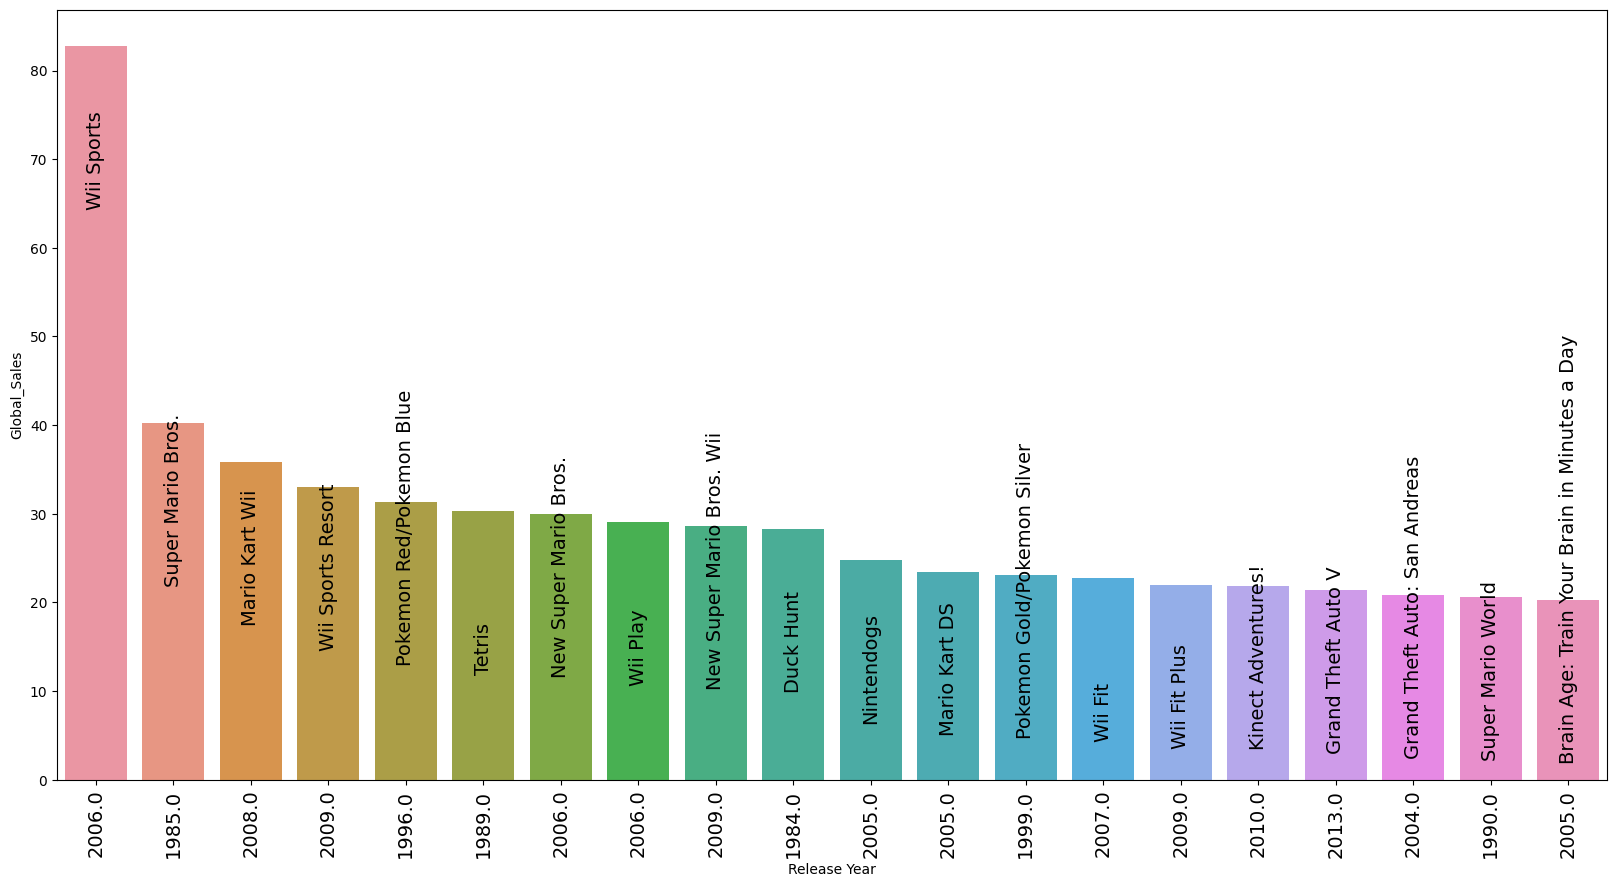

In [ ]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

In [ ]:
top_game_sale.iloc[:5, :]

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.82
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37


Огромным успехом в контексте мировых продаж пользуются игры на $Wii$-платформу, причём некоторые эксклюзивы для этой платформы вошли в топ-$5$ по мировым продажам. Стоит обратить на это внимание.

#Наибольший объём продаж среди всех платформ для каждого года

In [ ]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

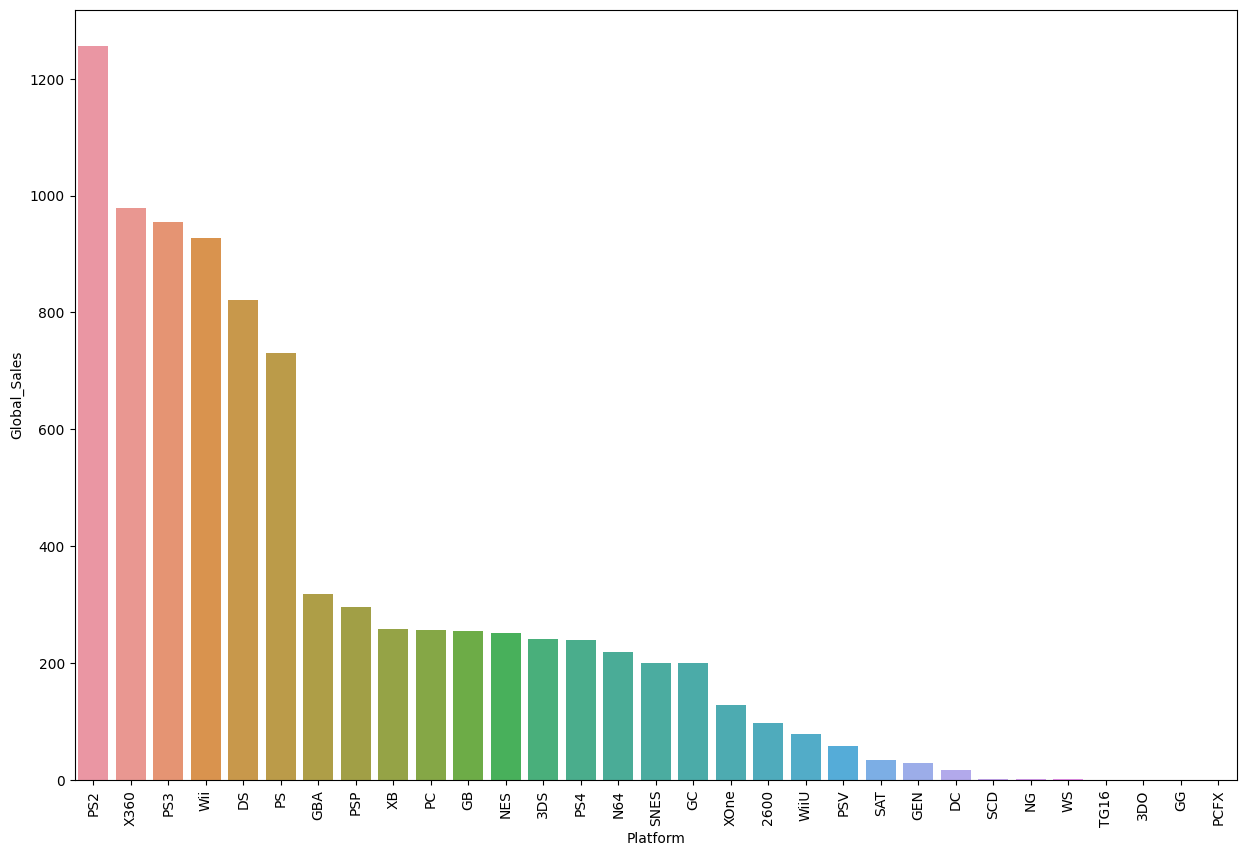

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90);

In [ ]:
data_platform.iloc[:5, :]

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.13
17,PS3,955.25
26,Wii,926.71
4,DS,822.20


Да, $PlayStation~2$ в своё время произвела "бум" в индустрии, она здесь явный и безоговорочный лидер. Впрочем и дальнейшие апгрейды данной платформы были успешны. Так же отметим основного конкурента $PlayStation$ $-$ $Xbox$, которой так же находятся в коллекции почти каждого игромана. Причём по нашим данным $Xbox~360$ обошла своего прямого конкурента того времени $PlayStation~3$. Отметим также платформу $Wii$, на которую мы обратили внимание ещё в предыдущем пункте, она здесь правда заняла $4$-е место, но показатели у неё конкурентоспособные с лидерами. И $5$-е место занимает ещё одна платформа от $Nintendo$, на этот раз портативная - $DS$, но её показатели уже заметно отстают от первой четвёрки.

Но если делать выводы из этой таблицы, то стоит понимать, что, все платформы, которые в топ-$5$ уже старенькие, т.е. у них больше времени для реализации в сравнении, например, с платформами нового поколения. Тут скорее целесообразно оценить ретроспективно и наметить тенденцию: успешность и конкуренция $PlayStation$ и $Xbox$, популярность семейных приставок на примере $Nintendo~Wii$, а также портативка от $Nintendo$ тоже имеет неплохие показатели.

#Распределение доходов по регионам

In [ ]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


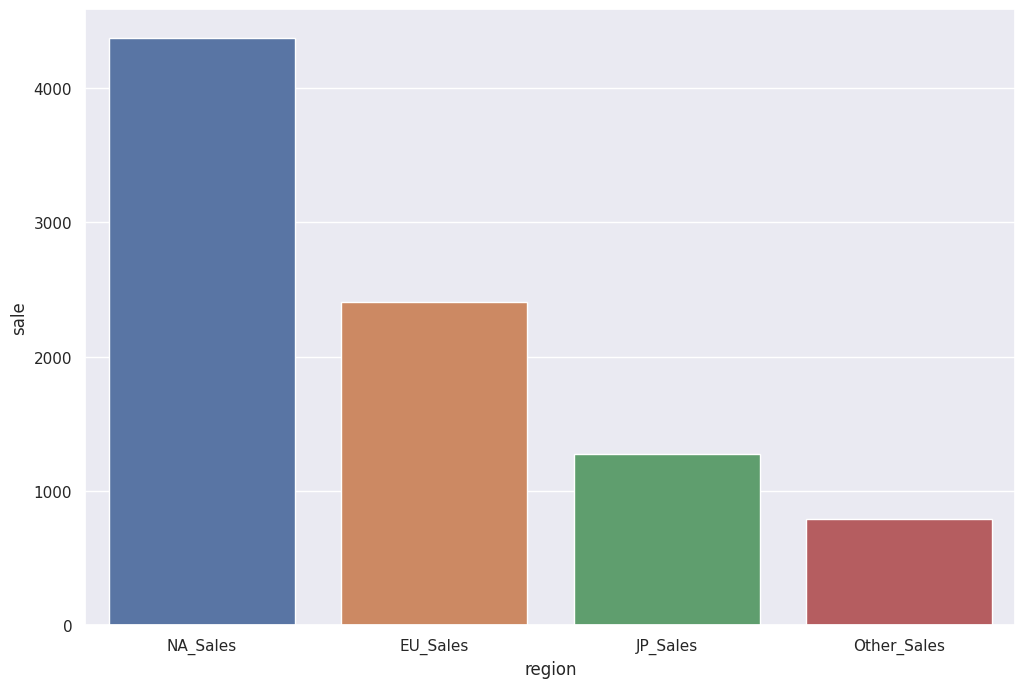

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg);

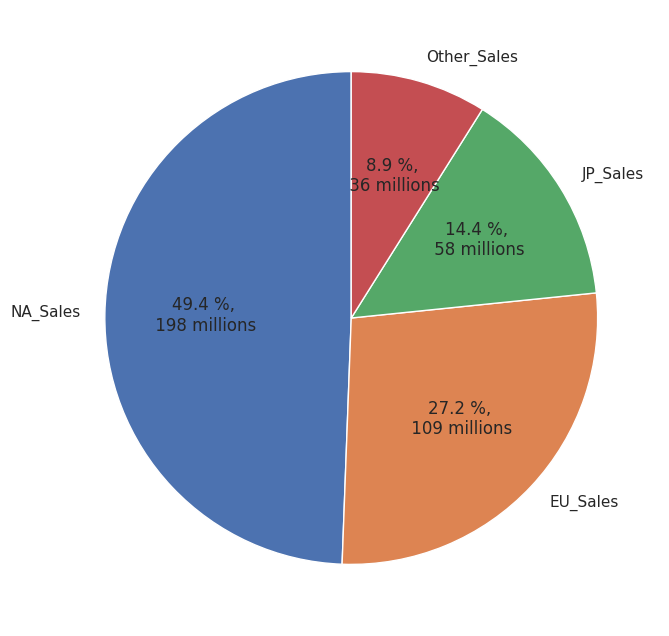

In [ ]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

sales = top_sale_reg['sale'].value_counts()
all_count = sales.count()
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct=lambda pct: f'{round(pct,1)} %,\n {round(pct*all_count)} millions', startangle=90);

#Продажи в различных частях мира по жанрам

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

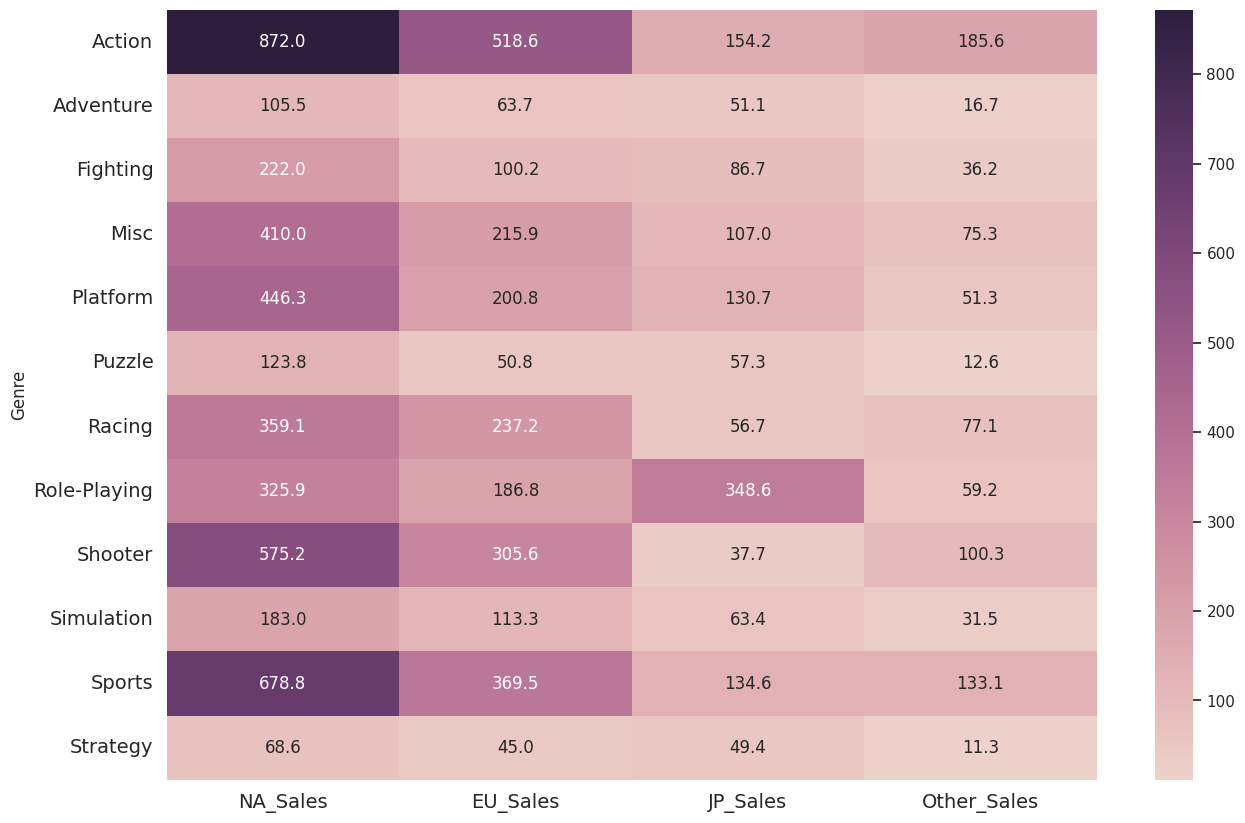

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f', cmap=sns.cubehelix_palette(as_cmap=True))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
comp_map.sort_values(by='NA_Sales', ascending=False).iloc[:5, :]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,871.96,518.64,154.15,185.55
Sports,678.78,369.49,134.59,133.05
Shooter,575.16,305.57,37.67,100.27
Platform,446.26,200.76,130.66,51.28
Misc,410.02,215.89,106.95,75.29


In [ ]:
comp_map.sort_values(by='EU_Sales', ascending=False).iloc[:5, :]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,871.96,518.64,154.15,185.55
Sports,678.78,369.49,134.59,133.05
Shooter,575.16,305.57,37.67,100.27
Racing,359.09,237.25,56.68,77.08
Misc,410.02,215.89,106.95,75.29


In [ ]:
comp_map.sort_values(by='JP_Sales', ascending=False).iloc[:5, :]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Role-Playing,325.89,186.77,348.64,59.17
Action,871.96,518.64,154.15,185.55
Sports,678.78,369.49,134.59,133.05
Platform,446.26,200.76,130.66,51.28
Misc,410.02,215.89,106.95,75.29


In [ ]:
comp_map.sort_values(by='Other_Sales', ascending=False).iloc[:5, :]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,871.96,518.64,154.15,185.55
Sports,678.78,369.49,134.59,133.05
Shooter,575.16,305.57,37.67,100.27
Racing,359.09,237.25,56.68,77.08
Misc,410.02,215.89,106.95,75.29


In [ ]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


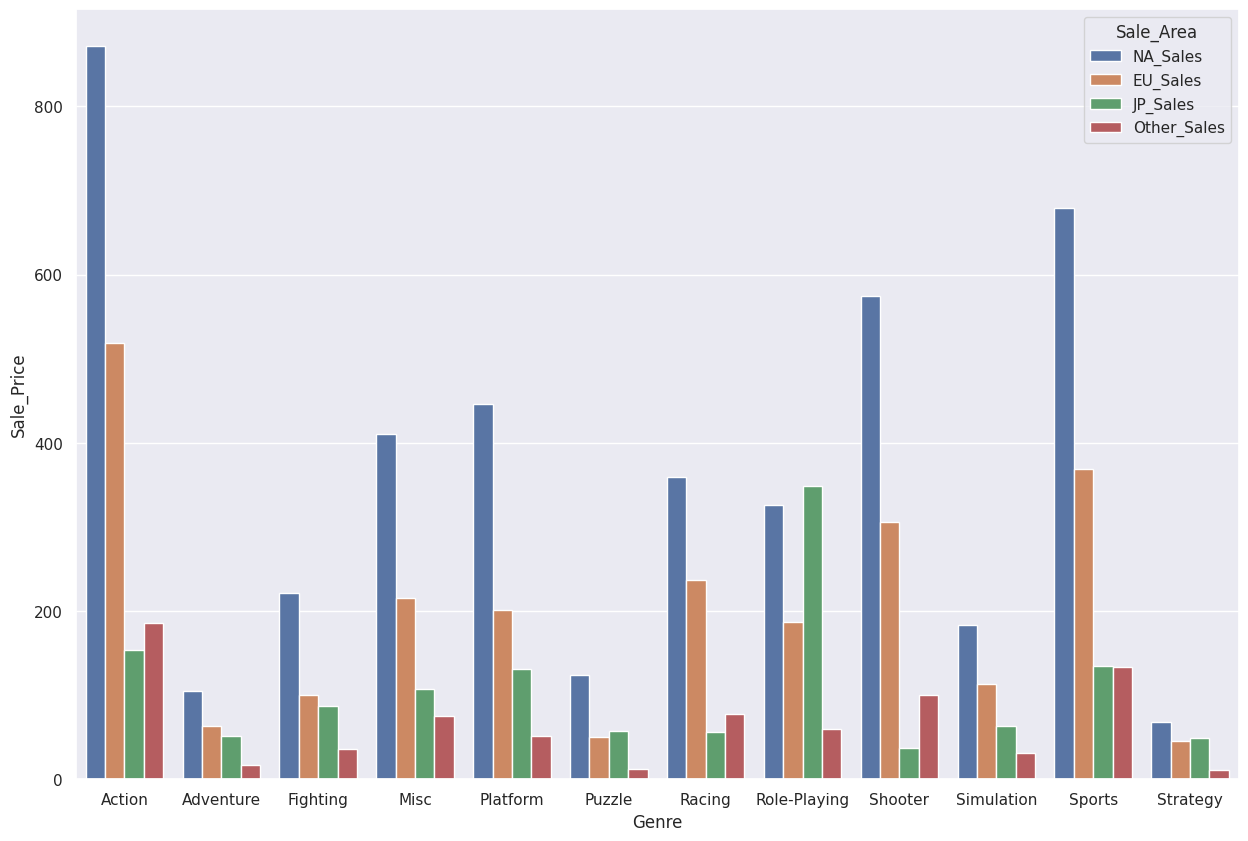

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table);

Стоит отметить высокие показатели продаж в Северной Америке, однако пропорции по жанрам для Европы и других стран в целом сохраняются. Исключение составляет Япония, у них огромной популярностью пользуются ролевые игры. Стабильно во всём мире любят экшн- (не ниже $2$-го места) и спортивные (не ниже $3$-го места) игры. Жанр $misc$ стабильно на $5$-м месте.

#Распределение продаж в каждой стране по платформам

In [ ]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [ ]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


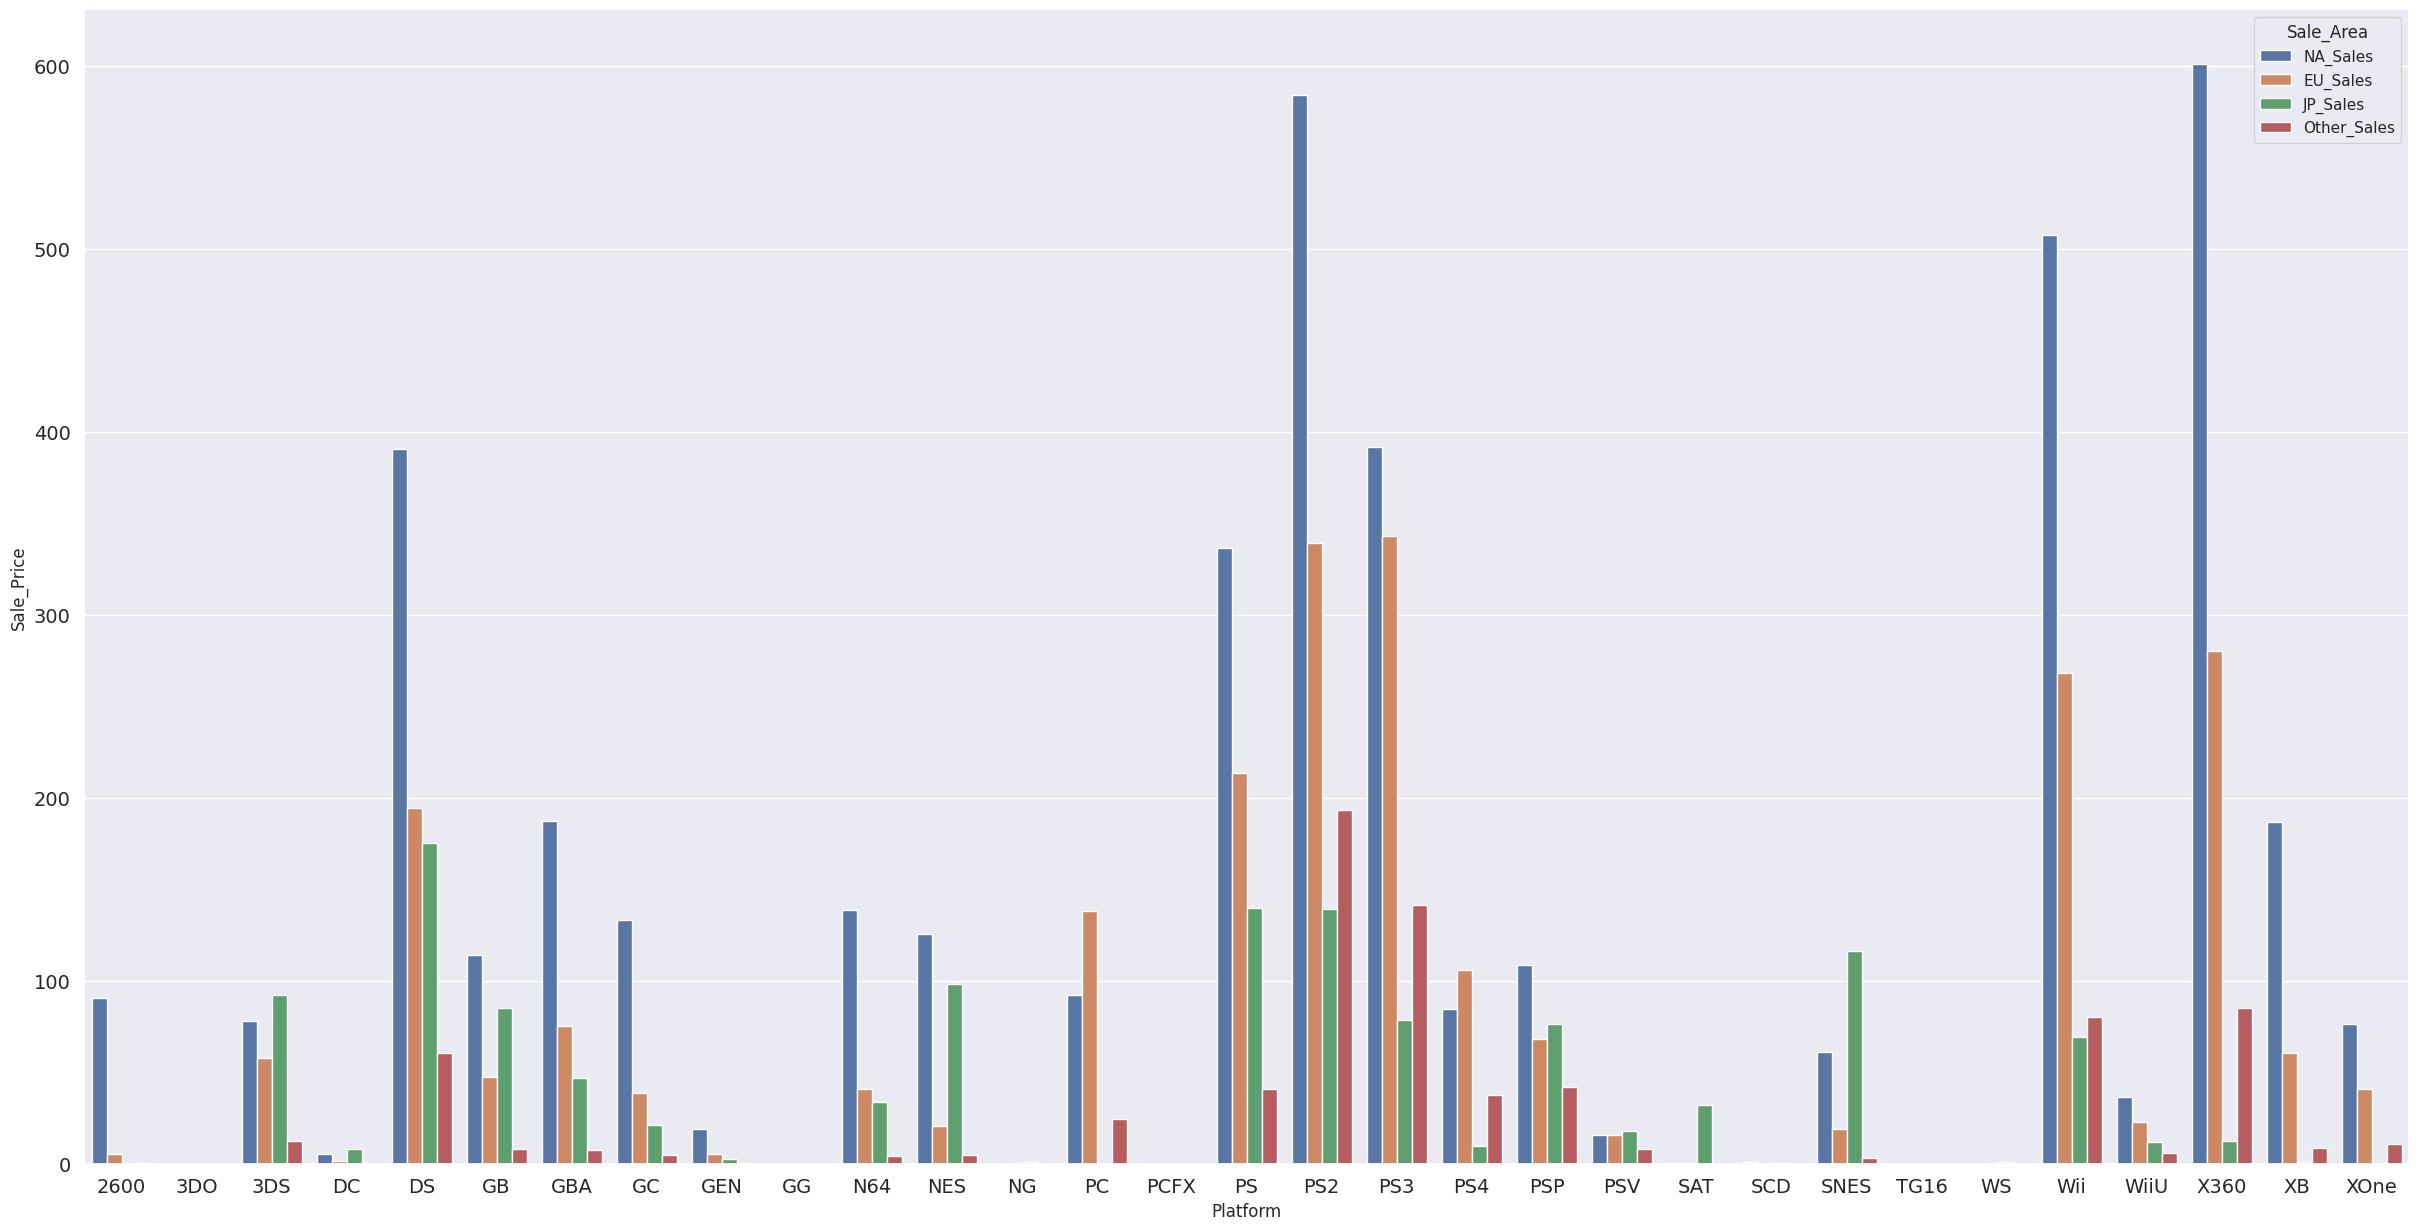

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
comp_table.sort_values(by='Sale_Price', ascending=False).iloc[:15, :]

,Platform,Sale_Area,Sale_Price
28,X360,NA_Sales,600.69
16,PS2,NA_Sales,583.84
26,Wii,NA_Sales,507.71
17,PS3,NA_Sales,391.86
4,DS,NA_Sales,390.44
48,PS3,EU_Sales,342.91
47,PS2,EU_Sales,339.29
15,PS,NA_Sales,336.51
59,X360,EU_Sales,280.18
57,Wii,EU_Sales,268.38


В целом во всех странах в плане продаж на конкретные приставки всё почти одинаково, только в Японии не любят серию $Xbox$ и компьютеры. В Америке очень любят серию $Nintendo$, собственно здесь намечается корреляция с Европой. В плане консолей $Playstation$ и $Xbox$ в среднем всё ровно. Но опять же отмечу, что оценивать по приставкам стоит с точки зрения ретроспективы и определения тенденций.

#Распределения количества проданных игр по их разработчикам за всё время

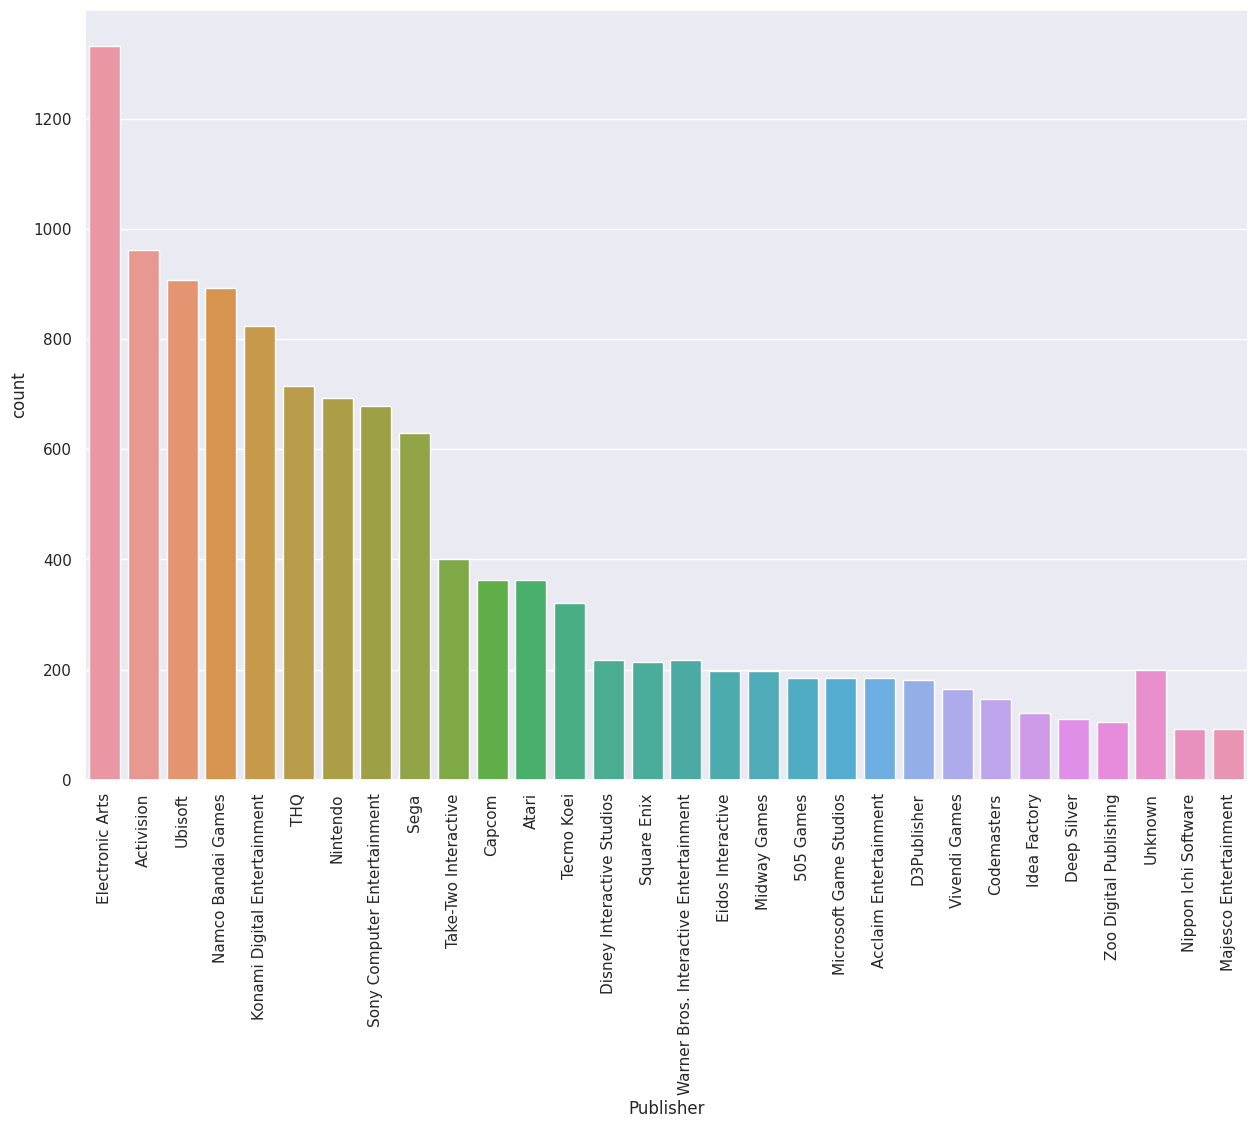

In [ ]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(30)
top_publisher = pd.DataFrame(top_publisher).reset_index()

plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order=data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:30].index)
plt.xticks(rotation=90);

In [ ]:
data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:10]

Publisher
Electronic Arts                 1319
Activision                       952
Ubisoft                          904
Namco Bandai Games               888
Konami Digital Entertainment     815
THQ                              712
Nintendo                         686
Sony Computer Entertainment      677
Sega                             622
Take-Two Interactive             400
Name: Year, dtype: int64

Явный лидер по количеству проданных за всё время игр $Electronic~Arts$, на самом деле у них действительно много, в том числе и потрясающих игр, поэтому их первенство в данном топике неудивительно. Далее идут $Activision$, $Ubisoft$, $Namco$ и $Konami$, а остальные уже довольно сильно отстают.

#Распределения объёмов мировых продаж по разработчикам за всё время

In [ ]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(30)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

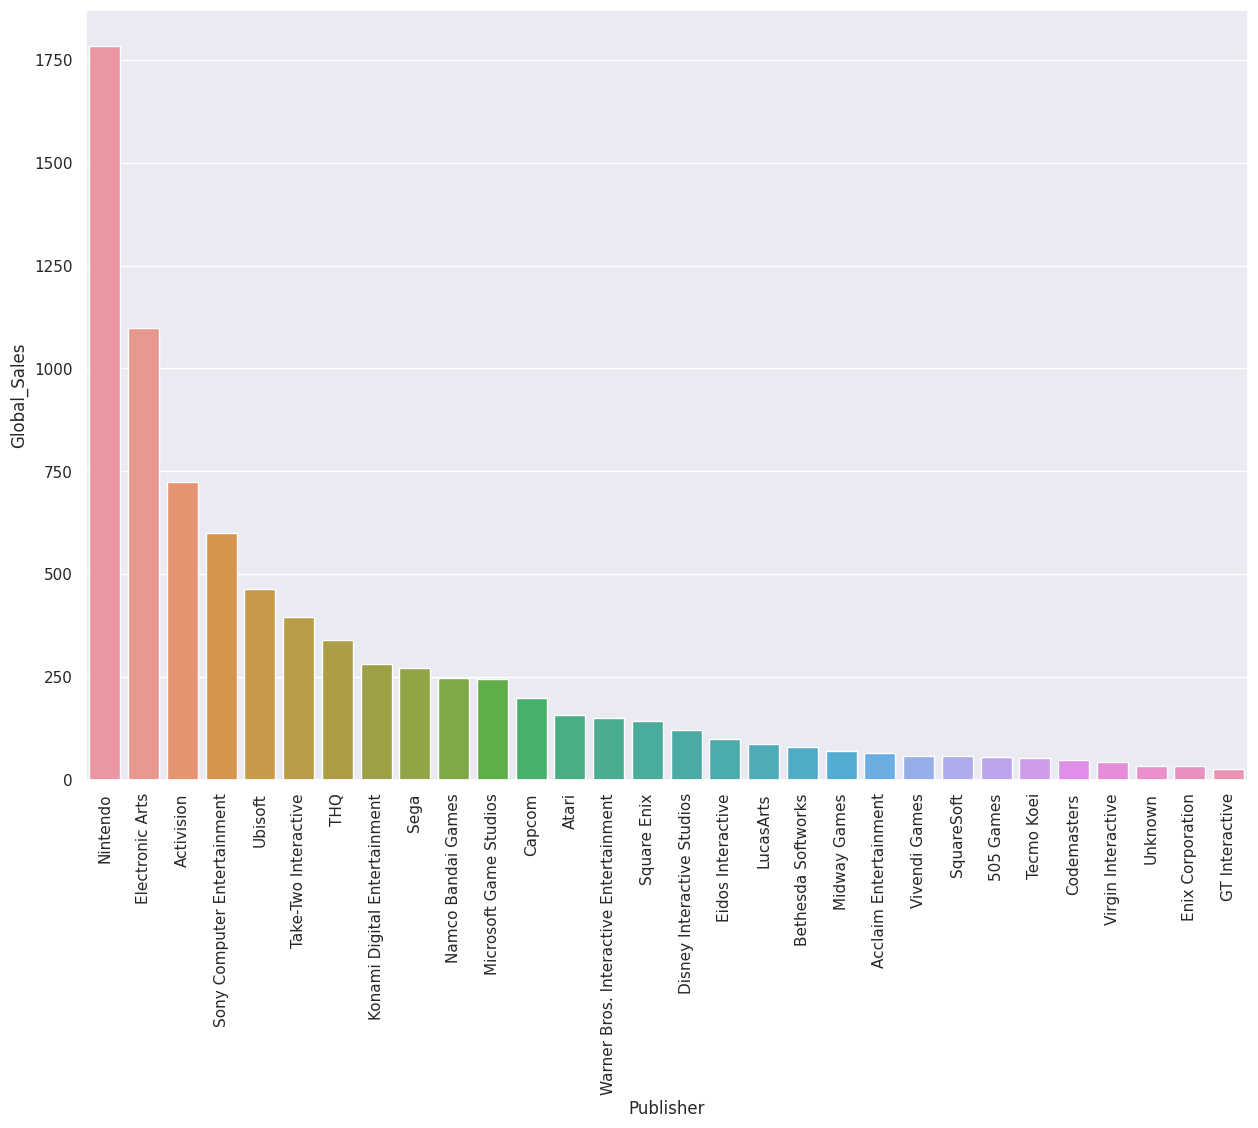

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90);

А вот по продажам в лидеры выбиваются компании, разрабатывающие эксклюзивные игры для своих платформ, в частности $Nintendo$ и $Sony~Computer~Entertainment$. Но $Electronic~Arts$ находятся на второй позиции, $Activision~-~$на треьей, $Ubisoft~-~$на пятой. Но тут стоит отметить, что не все компании разрабатывают много игр в год, некоторые разработчики планомерно разрабатывают свои игры, выверяют их, много тестируют на предмет багов и получают с одной игры в разы больше, чем другие с нескольких игр.

#Распределения объёмов продаж в отдельных странах по разработчикам

In [ ]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(30)

In [ ]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
115,Codemasters,Other_Sales,6.19
116,Virgin Interactive,Other_Sales,3.03
117,Unknown,Other_Sales,2.48
118,Enix Corporation,Other_Sales,0.27


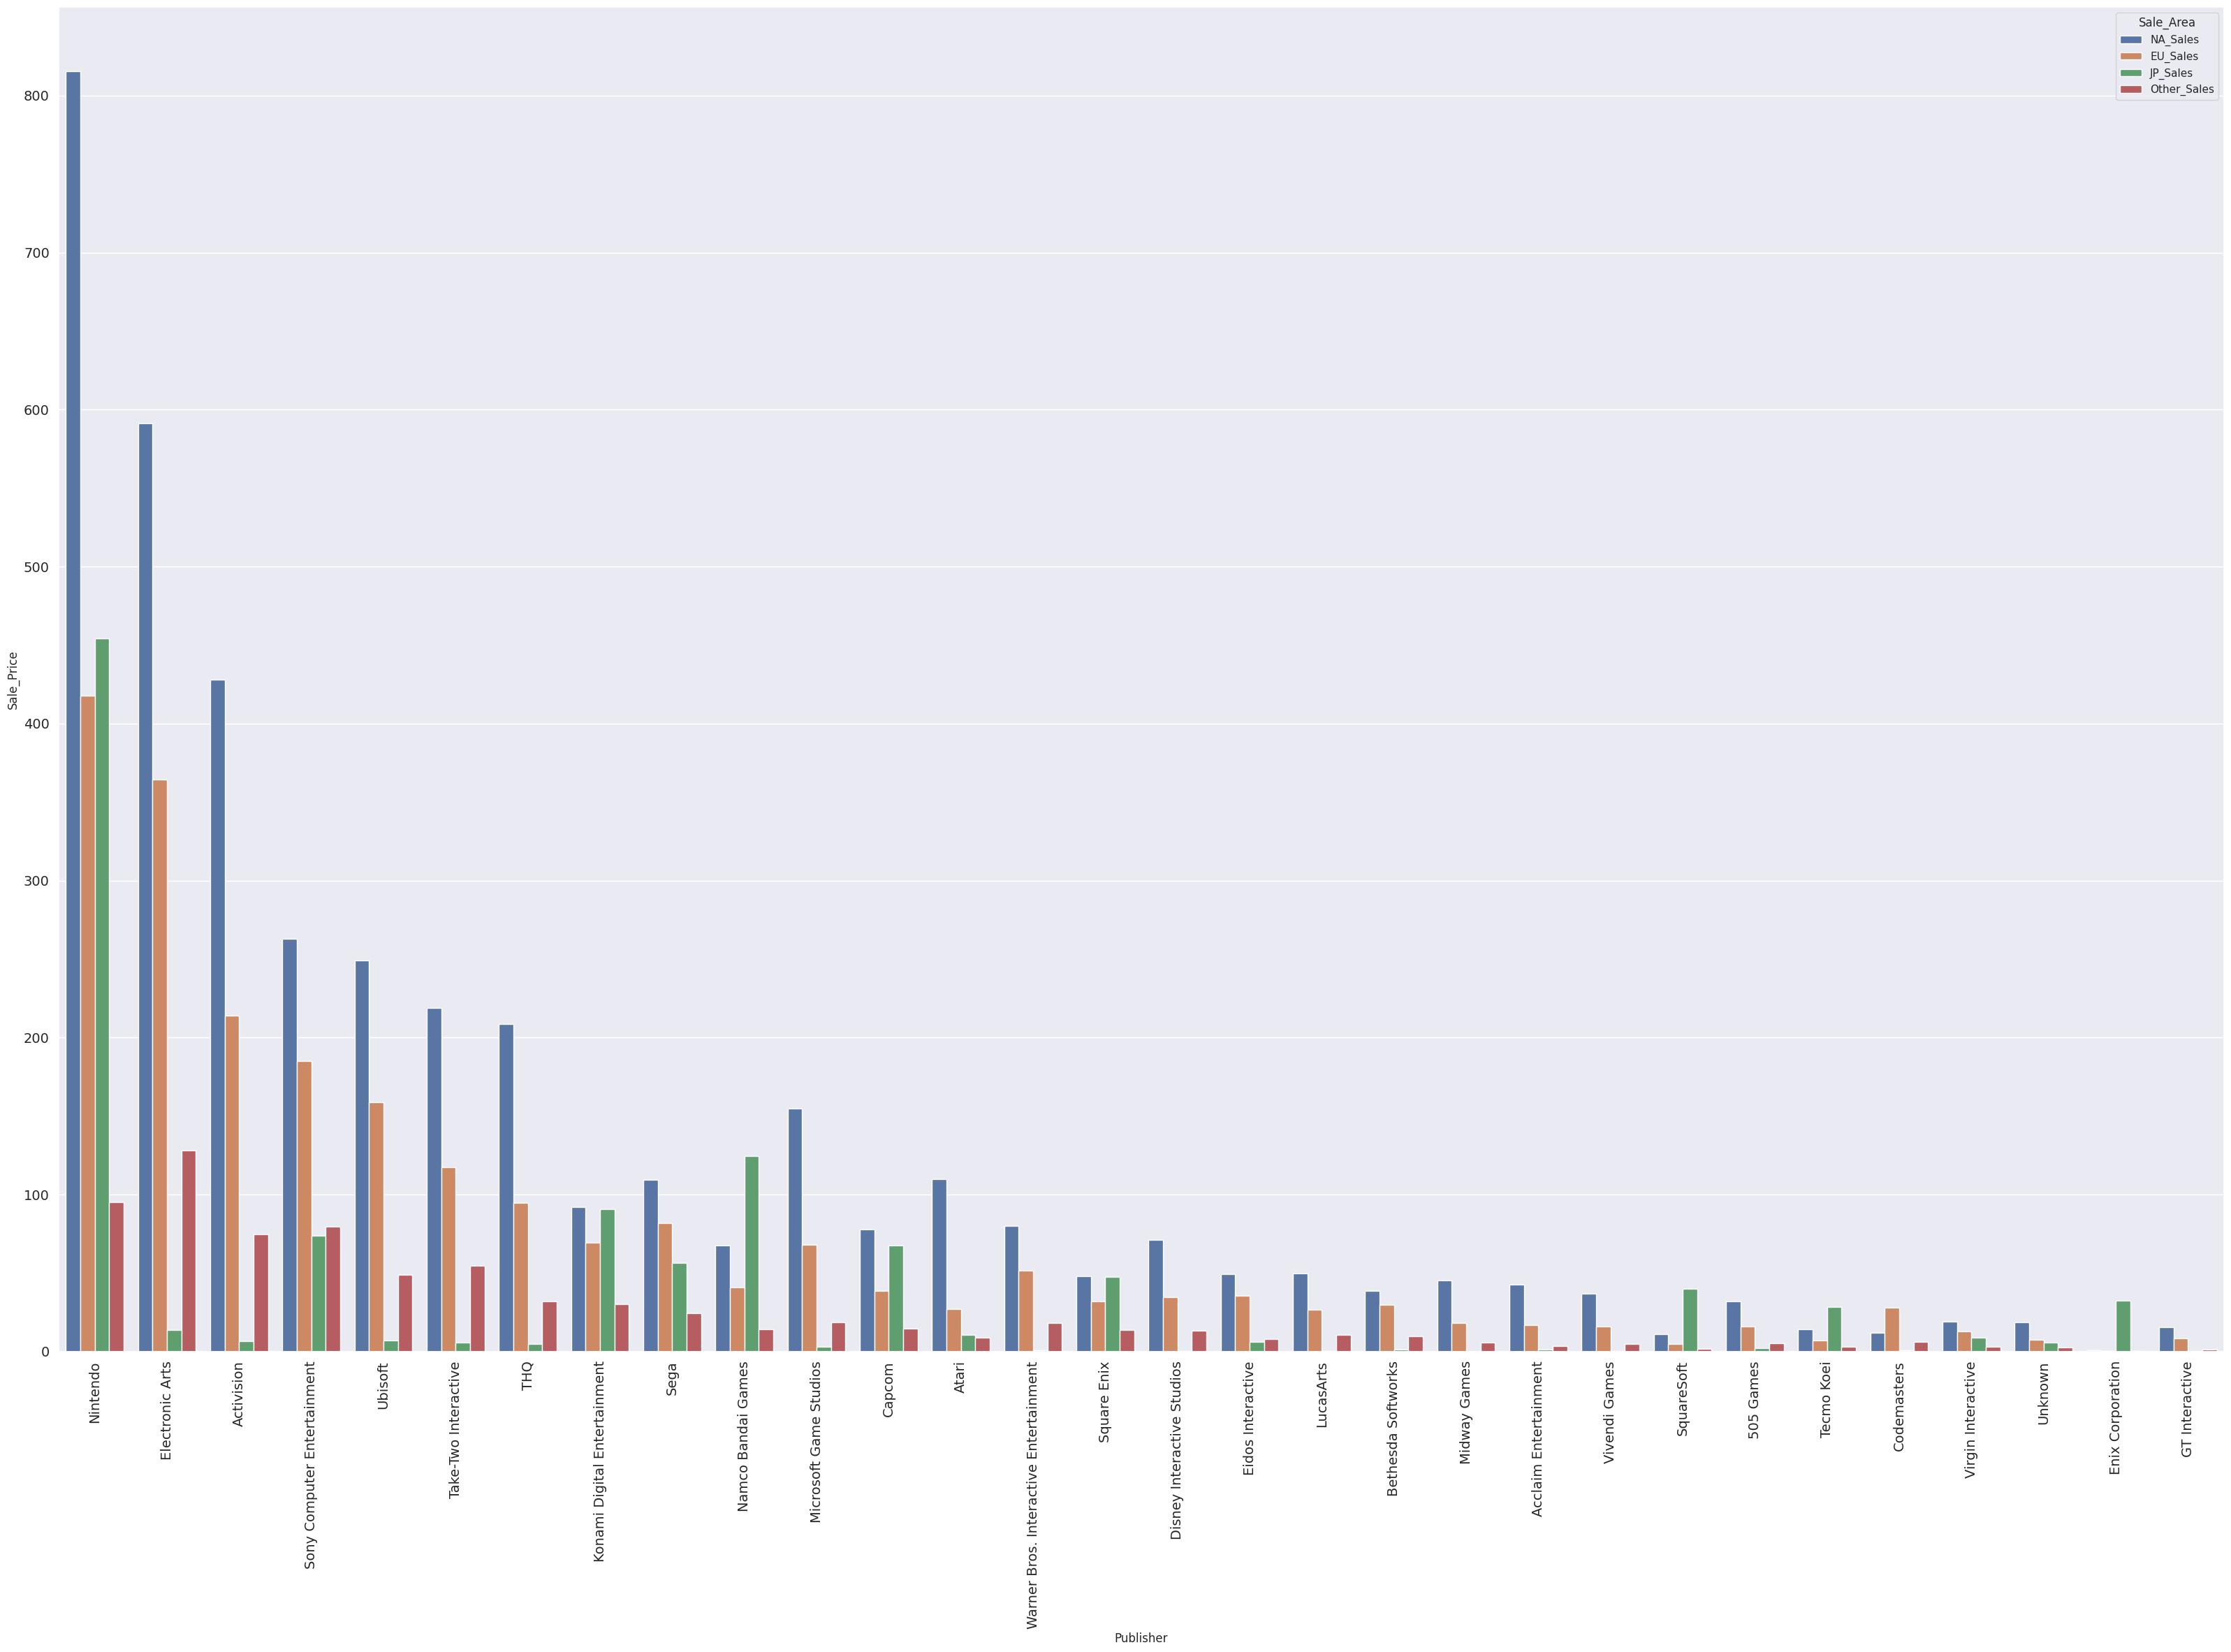

In [ ]:
plt.figure(figsize=(40, 25))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

Сразу же в глаза бросается, что японцы не любят всех разработчиков, кроме азиатских и разработчиков эксклюзивов для платформ $Nintendo$ и $PlayStation$. Возможно существует какое-то ограничение на ввоз игровой продукции в Японию. Однако это предположение никак не касается нашей работы, кроме как с той точки зрения, что Японию можно выбирать как страну для сбыта игровой продукции, если предположение верно. Если предположение неверно, то тогда скорее всего сами японцы не любят игры почти всех разработчиков (что, чисто субъективно, маловероятно). Между странами всем оставшимися странами в целом можно отметить корреляцию.

#Максимальные количества проданных игр наиболее продуктивных разработчиков за всё время

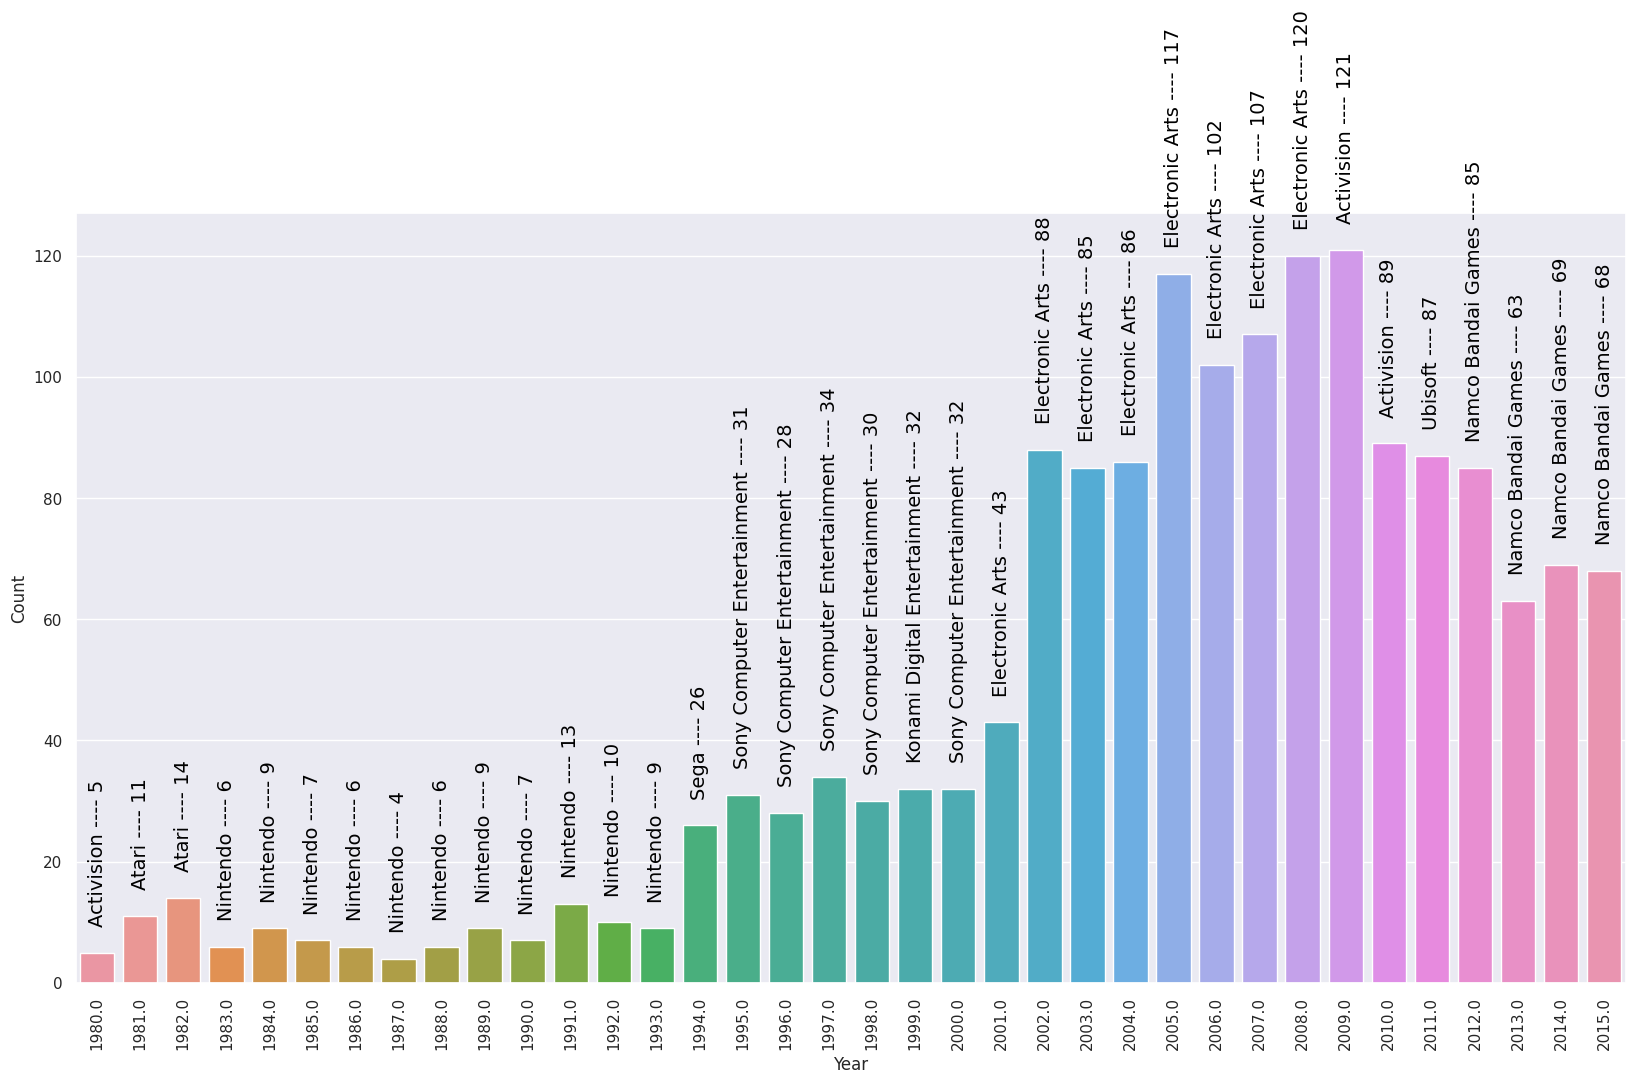

In [ ]:
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)

publisher= top_publisher_count['Publisher']
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value + 5, str(publisher[index] + ' ---- ' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

Отметим, что до второй половины $90$-х идёт эпоха $Nintendo$, далее можно отметить пятилетку $Sony$, нулевые года полностью захвачены $Electronic~Arts$ и последние $4$ года лидерство держали $Namco$. Отметим, всё время можно подразделить на эпохи доминирования определённых компаний.

In [ ]:
data_platform.iloc[:5, :]

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.13
17,PS3,955.25
26,Wii,926.71
4,DS,822.20


#Карта корреляции признаков

<ipython-input-191-0e1b3c385514>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="PiYG");


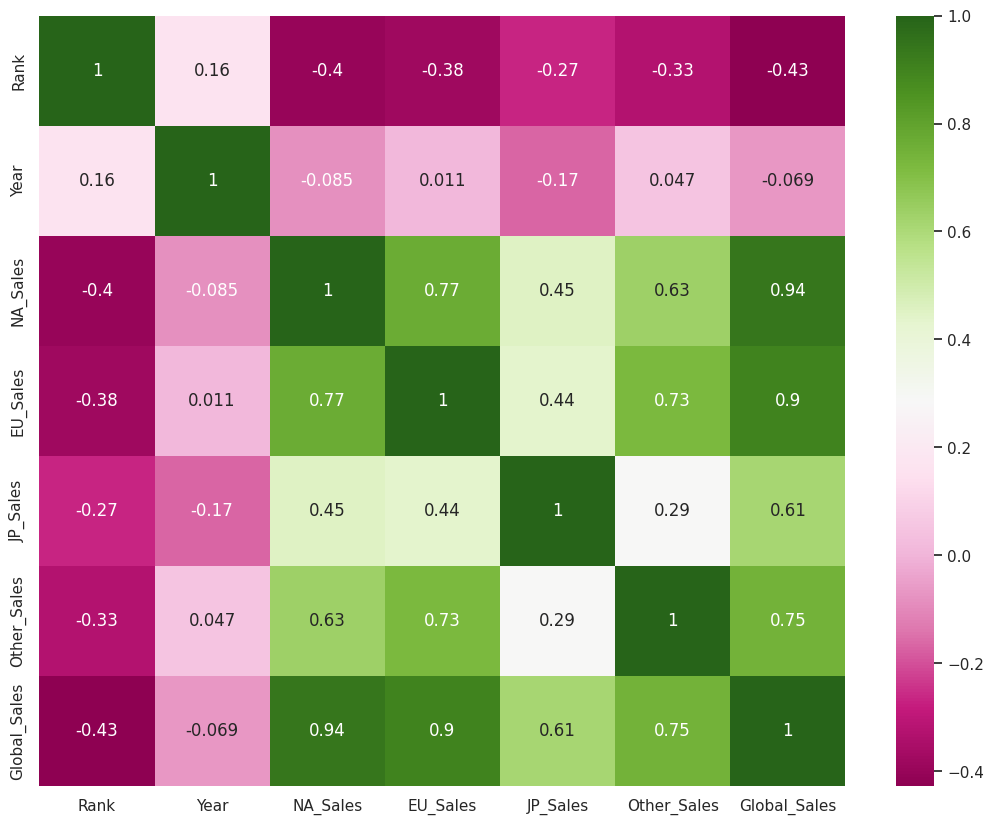

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), annot=True, cmap="PiYG");

Отметим, что в целом коррелируют только признаки связанные с продажами в регионах (как уже было отмечено визуально по графикам распределений). Прежде, чем выбрасывать какие-то признаки, нужно посмотреть корреляцию всех признаков с целевой переменной и выбросить те коррелирующие между собой признаки, которые имеют наименьшую корреляцию с целевой переменной, т.е. вносят наименьший вклад в её предсказание. В этой задаче таргет нам не дан, но если целевой переменной являются мировые продажи ($Global~Sales$), то удалить стоит только европейские продажи, т.к. этот признак довольно сильно коррелирует с двумя признаками.

<ipython-input-196-d9828789796d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(columns='EU_Sales').corr(), annot=True, cmap="PiYG");


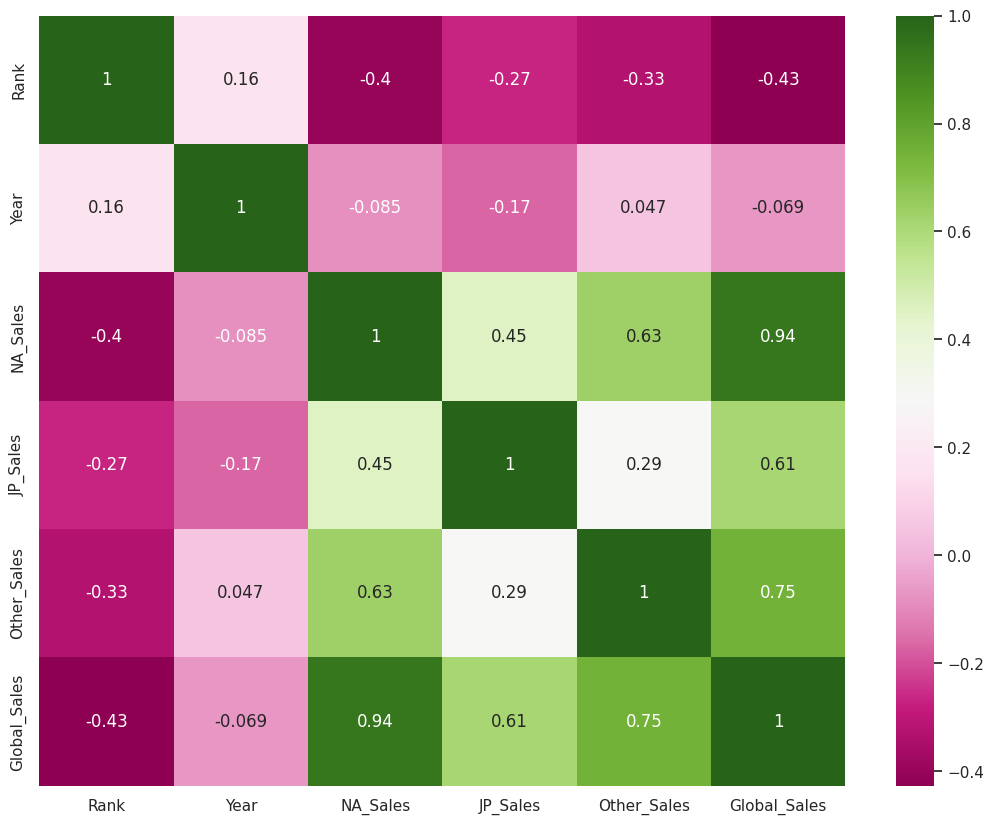

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(data.drop(columns='EU_Sales').corr(), annot=True, cmap="PiYG");

#Заключение

Итак, наиболее перспективный жанр игр для разработки $-$ экшен. Однако стоит отметить, что всё довольно относительно. Например, если игры реализовывать в Японии, то скорее всего получим не очень хорошие результаты, поскольку, как отмечалось, японцы не сильно любят экшен-игры. У них особой популярностью пользуются ролевые игры, которые в остальном мире не так уж и популярны. Реализовывать продукцию наиболее перспективно в Северной Америке. Европа во всех смыслах в отношении видеоигр отстаёт в $1,5$-$2$ раза.

Так же отметим, что возможно не стоит занимать нишу экшен-игр, т.к. конкуренция слишком высока. Но если делать качественный продукт, то в целом можно выходить в прибыль. Экшен-игры довольно размазанный жанр и поэтому сюда могут и зачастую попадают "проходные" игры, например по фильмам, которые не отличаются качественностью и опытный игроман будет обходить их стороной. Если пытаться заходить на этот рынок не через жанр, а через платформу, то стоит отметить $Nintendo$, у них формат игр несколько отличается от остальных. Для примера, у их консоли $Wii$ специфичный контроллер, имеющий как сенсор движения, так и традиционные элементы управления, что определяет специфику выпускаемых игр $-$ обычно это активные игры, в т.ч. жанр спорт. Продажи у игр этой консоли внушительные, в частности одна из самых продаваемых игр в мире именно жанра "спорт" и именно для этой консоли (с учётом того, что объекты в наборе данных ранжированы по $Global Sales$, в этом можно легко убедиться). Поэтому жанр спорт, в принципе, резонно можно привязать к $Wii$.